# Welcome to My JupyterBook

## About Me

Hello! I'm Abhyudhay S R, a Master's student in Data Science. This notebook showcases my portfolio, including my resume, final code, embedded video, and links to various resources such as my MLFlow experiments, Docker container, deployed model, and Streamlit app.

## My Resume

Here is my resume -

<div align = "center">
<kbd>
<img src="resume.jpg" alt="alt text"/>
</kbd>
</div>
<br>


## Video

Watch my video below:

https://drive.google.com/file/d/1QWf0ER_QcHXC00BklXMqwQd9Mx0v6Y8X/view?usp=sharing


## Links

Here are some important links to my experiments, model, and deployed applications:

- [DagsHub and MLflow Experiment](https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0?searchFilter=&orderByKey=attributes.start_time&orderByAsc=false&startTime=ALL&lifecycleFilter=Active&modelVersionFilter=All+Runs&datasetsFilter=W10%3D)
- [Docker Hub Container](https://hub.docker.com/r/abhyudhaysr/fastapi-streamlit-app/tags)
- [Hosted Streamlit App](http://3.148.117.160:8501/)

# Final Code

# Data Pre-Processing

In [2]:
import pandas as pd

# Load the dataset (using previously defined column names)
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
file_path = "wdbc.data"  # Path to your uploaded file
df = pd.read_csv(file_path, header=None, names=column_names)

# Create the Patient Table
patient_table = df[["ID", "Diagnosis"]].copy()
patient_table["Diagnosis"] = patient_table["Diagnosis"].map({"M": 1, "B": 0})  # Convert to binary

# Create the Feature Table
feature_table = df.drop(columns=["Diagnosis"]).copy()

# Preview both tables
print("Patient Table Preview:")
print(patient_table.head())

print("\nFeature Table Preview:")
print(feature_table.head())

Patient Table Preview:
         ID  Diagnosis
0    842302          1
1    842517          1
2  84300903          1
3  84348301          1
4  84358402          1

Feature Table Preview:
         ID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0    842302      17.99      10.38     122.80     1001.0    0.11840    0.27760   
1    842517      20.57      17.77     132.90     1326.0    0.08474    0.07864   
2  84300903      19.69      21.25     130.00     1203.0    0.10960    0.15990   
3  84348301      11.42      20.38      77.58      386.1    0.14250    0.28390   
4  84358402      20.29      14.34     135.10     1297.0    0.10030    0.13280   

   Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  Feature_23  \
0     0.3001    0.14710     0.2419  ...       25.38       17.33      184.60   
1     0.0869    0.07017     0.1812  ...       24.99       23.41      158.80   
2     0.1974    0.12790     0.2069  ...       23.57       25.53      152.50   
3     0.2414

In [3]:
import sqlite3

# Connect to SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect("breast_cancer.db")
cursor = conn.cursor()

# Create Patient Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Patient (
    PatientID INTEGER PRIMARY KEY,
    Diagnosis INTEGER
);
""")

# Create Feature Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Feature (
    PatientID INTEGER,
    Feature_1 REAL,
    Feature_2 REAL,
    Feature_3 REAL,
    Feature_4 REAL,
    Feature_5 REAL,
    Feature_6 REAL,
    Feature_7 REAL,
    Feature_8 REAL,
    Feature_9 REAL,
    Feature_10 REAL,
    Feature_11 REAL,
    Feature_12 REAL,
    Feature_13 REAL,
    Feature_14 REAL,
    Feature_15 REAL,
    Feature_16 REAL,
    Feature_17 REAL,
    Feature_18 REAL,
    Feature_19 REAL,
    Feature_20 REAL,
    Feature_21 REAL,
    Feature_22 REAL,
    Feature_23 REAL,
    Feature_24 REAL,
    Feature_25 REAL,
    Feature_26 REAL,
    Feature_27 REAL,
    Feature_28 REAL,
    Feature_29 REAL,
    Feature_30 REAL,
    FOREIGN KEY (PatientID) REFERENCES Patient(PatientID)
);
""")

print("Tables created successfully!")

Tables created successfully!


In [4]:
# Insert data into Patient Table
patient_table.to_sql("Patient", conn, if_exists="replace", index=False)

# Insert data into Feature Table
feature_table.to_sql("Feature", conn, if_exists="replace", index=False)

print("Data inserted successfully!")


Data inserted successfully!


In [5]:
# Query Patient Table
print("Patient Table Sample:")
print(pd.read_sql_query("SELECT * FROM Patient LIMIT 5;", conn))

# Query Feature Table
print("\nFeature Table Sample:")
print(pd.read_sql_query("SELECT * FROM Feature LIMIT 5;", conn))


Patient Table Sample:
         ID  Diagnosis
0    842302          1
1    842517          1
2  84300903          1
3  84348301          1
4  84358402          1

Feature Table Sample:
         ID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0    842302      17.99      10.38     122.80     1001.0    0.11840    0.27760   
1    842517      20.57      17.77     132.90     1326.0    0.08474    0.07864   
2  84300903      19.69      21.25     130.00     1203.0    0.10960    0.15990   
3  84348301      11.42      20.38      77.58      386.1    0.14250    0.28390   
4  84358402      20.29      14.34     135.10     1297.0    0.10030    0.13280   

   Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  Feature_23  \
0     0.3001    0.14710     0.2419  ...       25.38       17.33      184.60   
1     0.0869    0.07017     0.1812  ...       24.99       23.41      158.80   
2     0.1974    0.12790     0.2069  ...       23.57       25.53      152.50   
3     0.2414  

In [6]:
# Query to join Patient and Feature tables
query = """
SELECT p.ID, p.Diagnosis,
       f.Feature_1, f.Feature_2, f.Feature_3, f.Feature_4, f.Feature_5,
       f.Feature_6, f.Feature_7, f.Feature_8, f.Feature_9, f.Feature_10,
       f.Feature_11, f.Feature_12, f.Feature_13, f.Feature_14, f.Feature_15,
       f.Feature_16, f.Feature_17, f.Feature_18, f.Feature_19, f.Feature_20,
       f.Feature_21, f.Feature_22, f.Feature_23, f.Feature_24, f.Feature_25,
       f.Feature_26, f.Feature_27, f.Feature_28, f.Feature_29, f.Feature_30
FROM Patient p
JOIN Feature f ON p.ID = f.ID;
"""

# Execute the query and load into a Pandas DataFrame
combined_data = pd.read_sql_query(query, conn)

# Display the first few rows of the combined DataFrame
print("Combined Data Preview:")
print(combined_data.head())

Combined Data Preview:
         ID  Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302          1      17.99      10.38     122.80     1001.0    0.11840   
1    842517          1      20.57      17.77     132.90     1326.0    0.08474   
2  84300903          1      19.69      21.25     130.00     1203.0    0.10960   
3  84348301          1      11.42      20.38      77.58      386.1    0.14250   
4  84358402          1      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   Feature_24  

Missing Values:
 ID            0
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64

Class Distribution:
 Diagnosis
0    357
1    212
Name: count, dtype: int64


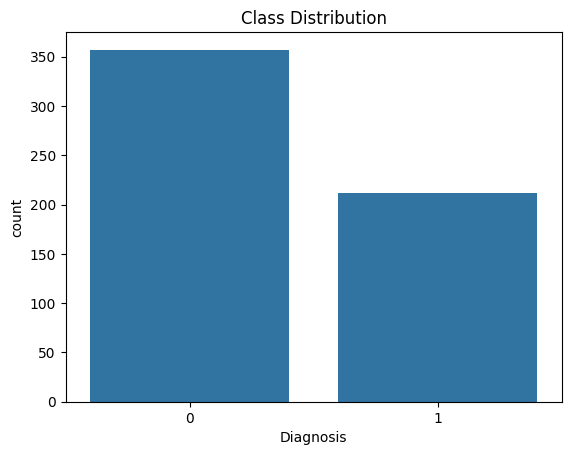

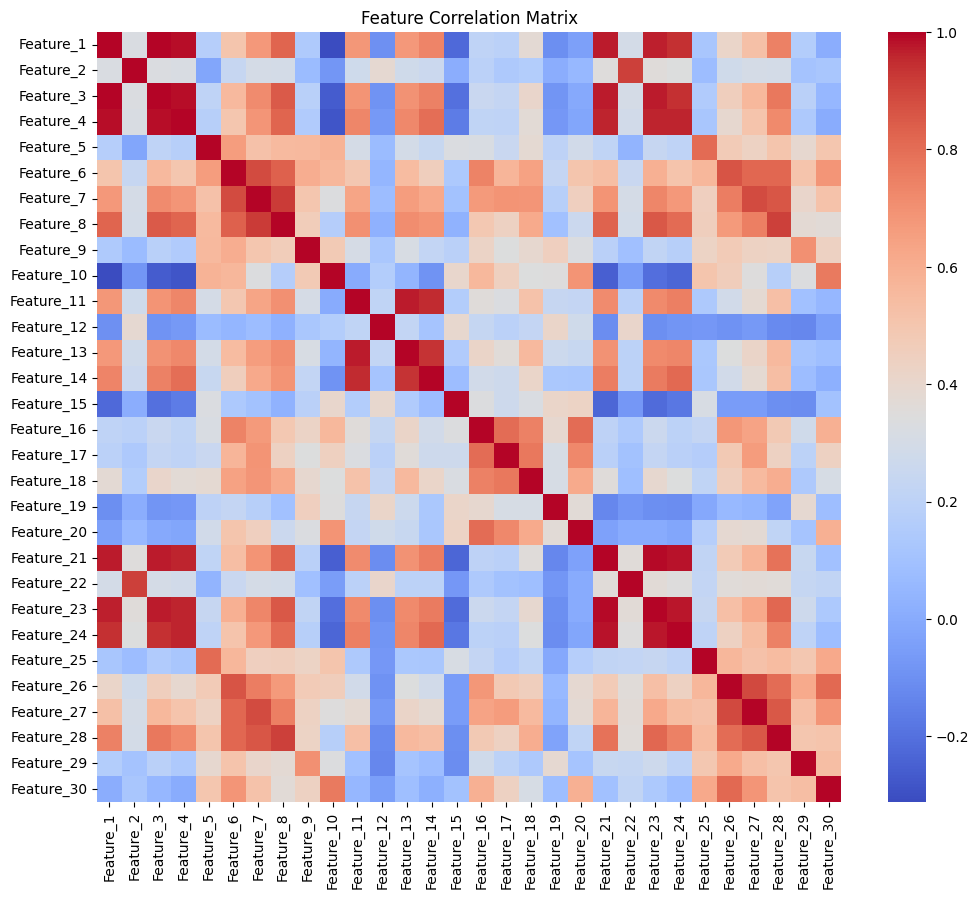


Feature Statistics:
                  ID   Diagnosis   Feature_1   Feature_2   Feature_3  \
count  5.690000e+02  569.000000  569.000000  569.000000  569.000000   
mean   3.037183e+07    0.372583   14.127292   19.289649   91.969033   
std    1.250206e+08    0.483918    3.524049    4.301036   24.298981   
min    8.670000e+03    0.000000    6.981000    9.710000   43.790000   
25%    8.692180e+05    0.000000   11.700000   16.170000   75.170000   
50%    9.060240e+05    0.000000   13.370000   18.840000   86.240000   
75%    8.813129e+06    1.000000   15.780000   21.800000  104.100000   
max    9.113205e+08    1.000000   28.110000   39.280000  188.500000   

         Feature_4   Feature_5   Feature_6   Feature_7   Feature_8  ...  \
count   569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean    654.889104    0.096360    0.104341    0.088799    0.048919  ...   
std     351.914129    0.014064    0.052813    0.079720    0.038803  ...   
min     143.500000    0.052630    0.01

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check for missing values
print("Missing Values:\n", combined_data.isnull().sum())

# 2. Explore class distribution
print("\nClass Distribution:\n", combined_data["Diagnosis"].value_counts())
sns.countplot(x="Diagnosis", data=combined_data)
plt.title("Class Distribution")
plt.show()

# 3. Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = combined_data.iloc[:, 2:].corr()  # Exclude ID and Diagnosis columns
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

# 4. Basic statistics
print("\nFeature Statistics:\n", combined_data.describe())


In [8]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = combined_data.drop(columns=["ID", "Diagnosis"])  # Features
y = combined_data["Diagnosis"]                      # Target

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm class distribution
print("Training Class Distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting Class Distribution:")
print(y_test.value_counts(normalize=True))


Training Class Distribution:
Diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64

Testing Class Distribution:
Diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for easier analysis
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of scaled training data
print("Scaled Training Data Preview:")
print(X_train_scaled.head())

Scaled Training Data Preview:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.518559   0.891826   0.424632   0.383925  -0.974744  -0.689772   
1  -0.516364  -1.639710  -0.541349  -0.542961   0.476219  -0.631834   
2  -0.368118   0.455515  -0.388250  -0.402970  -1.432979  -0.383927   
3   0.205285   0.726168   0.400330   0.070612   0.243253   2.203585   
4   1.243005   0.194195   1.210377   1.206652  -0.111442   0.051348   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_21  Feature_22  \
0  -0.688586  -0.398175  -1.039155   -0.825056  ...    0.579798    1.313242   
1  -0.604281  -0.303075   0.521543   -0.454523  ...   -0.582459   -1.690291   
2  -0.342175  -0.765459  -0.850857   -0.226171  ...   -0.398622    0.181977   
3   2.256094   1.213233   0.818474    0.899791  ...   -0.000309    0.274191   
4   0.732962   0.713767  -0.427187   -0.822184  ...    1.012835    0.223144   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Featu

In [10]:
!pip install -q dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.0/254.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import mlflow
import mlflow.sklearn
import dagshub
dagshub.init(repo_owner='abhyudhaysr', repo_name='my-first-repo', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=5ddbccd3-1341-4733-8356-dcd20c1fb030&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=8425cad4f36241d103ab607ca8487d2743385bc742e0ad7dcd157812fe5a3603




Accessing as abhyudhaysr

Initialized MLflow to track repo "abhyudhaysr/my-first-repo"

Repository abhyudhaysr/my-first-repo initialized!

In [11]:
print("Unique classes in y_test:", set(y_test))

Unique classes in y_test: {0, 1}


# Experiment 1

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
import numpy as np
import mlflow
from sklearn.linear_model import LogisticRegression


# Log Transformation Function
def log_transform(X):
    return np.log1p(X)

# Initialize pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("minmax", MinMaxScaler()),
    ("log_transform", FunctionTransformer(log_transform, validate=True)),
    ("log_reg", LogisticRegression(random_state=42, max_iter=1000))
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Train and evaluate
with mlflow.start_run():
    # Cross-validation F1-scores
    f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=make_scorer(f1_score))
    y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=cv)

    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_cv).ravel()

    # Log metrics to MLFlow
    mlflow.log_metric("F1_Score_Mean", np.mean(f1_scores))
    mlflow.log_metric("F1_Score_Std", np.std(f1_scores))
    mlflow.log_metric("True_Negatives", tn)
    mlflow.log_metric("False_Positives", fp)
    mlflow.log_metric("False_Negatives", fn)
    mlflow.log_metric("True_Positives", tp)

    print(f"F1-Score (mean): {np.mean(f1_scores)}")
    print(f"F1-Score (std): {np.std(f1_scores)}")
    print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    # Hyperparameter tuning example
    # Log hyperparameter settings
    mlflow.log_param("max_iter", 1000)
    mlflow.log_param("penalty", "l2")
    mlflow.log_param("solver", "lbfgs")


F1-Score (mean): 0.9376195330323771
F1-Score (std): 0.01696654094059776
Confusion Matrix: TN=284, FP=1, FN=19, TP=151


# Experiment 2

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Make sure xgboost is installed: `pip install xgboost`

# Initialize classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "RidgeClassifier": RidgeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBClassifier": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Experiment 2: Iterate over classifiers
for name, clf in classifiers.items():
    with mlflow.start_run(run_name=f"Experiment_2_{name}"):
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("classifier", clf)
        ])

        # Cross-validation F1-scores
        f1_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=cv, scoring=make_scorer(f1_score))
        y_pred_cv = cross_val_predict(pipeline, X_train_scaled, y_train, cv=cv)

        # Confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_train, y_pred_cv).ravel()

        # Log metrics to MLFlow
        mlflow.log_param("classifier", name)
        mlflow.log_metric("F1_Score_Mean", np.mean(f1_scores))
        mlflow.log_metric("F1_Score_Std", np.std(f1_scores))
        mlflow.log_metric("True_Negatives", tn)
        mlflow.log_metric("False_Positives", fp)
        mlflow.log_metric("False_Negatives", fn)
        mlflow.log_metric("True_Positives", tp)

        print(f"Classifier: {name}")
        print(f"F1-Score (mean): {np.mean(f1_scores)}")
        print(f"F1-Score (std): {np.std(f1_scores)}")
        print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")


Classifier: LogisticRegression
F1-Score (mean): 0.9645989974937343
F1-Score (std): 0.01419833232283792
Confusion Matrix: TN=280, FP=5, FN=7, TP=163
🏃 View run Experiment_2_LogisticRegression at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0/runs/0704703bc56246e8b1dd5d2908e50983
🧪 View experiment at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0
Classifier: RidgeClassifier
F1-Score (mean): 0.9376892615886326
F1-Score (std): 0.023876361403433587
Confusion Matrix: TN=284, FP=1, FN=19, TP=151
🏃 View run Experiment_2_RidgeClassifier at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0/runs/7e6111d2520b420f9d738cedbc1aa2d2
🧪 View experiment at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0
Classifier: RandomForestClassifier
F1-Score (mean): 0.9470579102623815
F1-Score (std): 0.02167801232815656
Confusion Matrix: TN=276, FP=9, FN=9, TP=161
🏃 View run Experiment_2_RandomForestClassifier at: https://dagshub

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:45:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), No

🏃 View run Experiment_2_XGBClassifier at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0/runs/14ef00de8c1946ccb10ed897f440d44b
🧪 View experiment at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0


AttributeError: 'super' object has no attribute '__sklearn_tags__'

# Experiment 3

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
import mlflow
import numpy as np

# Feature engineering function
def feature_engineering(X):
    X = X.copy()  # Avoid modifying the original DataFrame
    # Example feature combinations
    X["Feature_1_div_Feature_2"] = X["Feature_1"] / (X["Feature_2"] + 1e-5)  # Avoid division by zero
    X["Feature_3_times_Feature_4"] = X["Feature_3"] * X["Feature_4"]
    X["Feature_5_plus_Feature_6"] = X["Feature_5"] + X["Feature_6"]
    return X

# Apply feature engineering to training and testing sets
X_train_engineered = feature_engineering(X_train)
X_test_engineered = feature_engineering(X_test)

# Initialize pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(random_state=42, max_iter=1000))
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Train and evaluate with engineered features
with mlflow.start_run(run_name="Experiment_3_Feature_Engineering"):
    # Cross-validation F1-scores
    f1_scores = cross_val_score(pipeline, X_train_engineered, y_train, cv=cv, scoring=make_scorer(f1_score))
    y_pred_cv = cross_val_predict(pipeline, X_train_engineered, y_train, cv=cv)

    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_cv).ravel()

    # Log metrics to MLFlow
    mlflow.log_metric("F1_Score_Mean", np.mean(f1_scores))
    mlflow.log_metric("F1_Score_Std", np.std(f1_scores))
    mlflow.log_metric("True_Negatives", tn)
    mlflow.log_metric("False_Positives", fp)
    mlflow.log_metric("False_Negatives", fn)
    mlflow.log_metric("True_Positives", tp)

    print("Experiment 3 - Feature Engineering")
    print(f"F1-Score (mean): {np.mean(f1_scores)}")
    print(f"F1-Score (std): {np.std(f1_scores)}")
    print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")


Experiment 3 - Feature Engineering
F1-Score (mean): 0.9703961230509903
F1-Score (std): 0.015083357159655338
Confusion Matrix: TN=281, FP=4, FN=6, TP=164
🏃 View run Experiment_3_Feature_Engineering at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0/runs/00f7bbd1c24a4a2388c4efb2a2c60d0a
🧪 View experiment at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0


# Experiment 4

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import mlflow

# 1. Correlation Threshold
def remove_highly_correlated_features(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return data.drop(columns=to_drop), to_drop

# Remove highly correlated features
X_train_corr, dropped_corr_features = remove_highly_correlated_features(X_train, threshold=0.9)
X_test_corr = X_test[X_train_corr.columns]  # Align test set columns with selected features

print(f"Dropped features due to high correlation: {dropped_corr_features}")

# 2. Feature Importance
def select_important_features(X, y, model, threshold=0.01):
    model.fit(X, y)
    importances = model.feature_importances_
    selected_features = X.columns[importances > threshold]
    return X[selected_features], selected_features, importances

# Use RandomForest for feature importance
rf = RandomForestClassifier(random_state=42, n_estimators=100)
X_train_importance, selected_features_importance, feature_importances = select_important_features(
    X_train_corr, y_train, rf, threshold=0.01
)
X_test_importance = X_test_corr[selected_features_importance]  # Align test set columns

print(f"Selected features based on importance: {selected_features_importance}")

# 3. Variance Threshold
var_thresh = VarianceThreshold(threshold=0.01)  # Threshold is variance
X_train_final = var_thresh.fit_transform(X_train_importance)
X_test_final = var_thresh.transform(X_test_importance)

# Convert back to DataFrame
X_train_final = pd.DataFrame(X_train_final, columns=X_train_importance.columns[var_thresh.get_support()])
X_test_final = pd.DataFrame(X_test_final, columns=X_train_importance.columns[var_thresh.get_support()])

print(f"Final selected features after variance threshold: {X_train_final.columns.tolist()}")

# 4. Train Model with Selected Features
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(random_state=42, max_iter=1000))
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

with mlflow.start_run(run_name="Experiment_4_Feature_Selection"):
    # Cross-validation F1-scores
    f1_scores = cross_val_score(pipeline, X_train_final, y_train, cv=cv, scoring=make_scorer(f1_score))
    y_pred_cv = cross_val_predict(pipeline, X_train_final, y_train, cv=cv)

    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_cv).ravel()

    # Log metrics to MLFlow
    mlflow.log_metric("F1_Score_Mean", np.mean(f1_scores))
    mlflow.log_metric("F1_Score_Std", np.std(f1_scores))
    mlflow.log_metric("True_Negatives", tn)
    mlflow.log_metric("False_Positives", fp)
    mlflow.log_metric("False_Negatives", fn)
    mlflow.log_metric("True_Positives", tp)

    # Log the selected features
    mlflow.log_param("Selected_Features", X_train_final.columns.tolist())

    print("Experiment 4 - Feature Selection")
    print(f"F1-Score (mean): {np.mean(f1_scores)}")
    print(f"F1-Score (std): {np.std(f1_scores)}")
    print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    print(f"Selected Features: {X_train_final.columns.tolist()}")


Dropped features due to high correlation: ['Feature_3', 'Feature_4', 'Feature_8', 'Feature_13', 'Feature_14', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_28']
Selected features based on importance: Index(['Feature_1', 'Feature_2', 'Feature_5', 'Feature_6', 'Feature_7',
       'Feature_9', 'Feature_10', 'Feature_11', 'Feature_15', 'Feature_16',
       'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_25',
       'Feature_26', 'Feature_27', 'Feature_29'],
      dtype='object')
Final selected features after variance threshold: ['Feature_1', 'Feature_2', 'Feature_11', 'Feature_26', 'Feature_27']
Experiment 4 - Feature Selection
F1-Score (mean): 0.908004754920288
F1-Score (std): 0.020683984606562605
Confusion Matrix: TN=272, FP=13, FN=18, TP=152
Selected Features: ['Feature_1', 'Feature_2', 'Feature_11', 'Feature_26', 'Feature_27']
🏃 View run Experiment_4_Feature_Selection at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0/runs/6819b

# Experiment 5

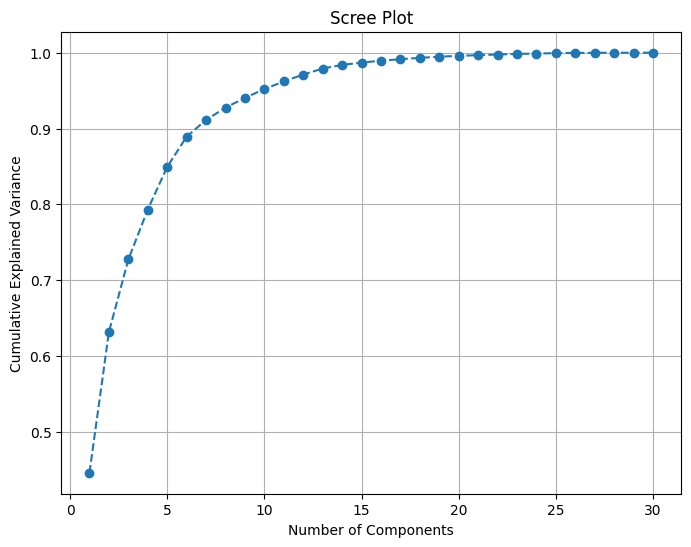

Number of Components Chosen for 90% Variance: 7
Mean Explained Variance Ratio: 0.03333333333333333
Cumulative Variance for 90%: 0.9114245416254098
🏃 View run Experiment_5_PCA at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0/runs/8a225e838e3043fc8e6fc83cf50da438
🧪 View experiment at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import mlflow

# Step 1: Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)  # Apply PCA to the scaled training data

# Step 2: Create Scree Plot
explained_variance = pca.explained_variance_ratio_  # Variance explained by each component
cumulative_variance = np.cumsum(explained_variance)  # Cumulative variance

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Step 3: Log PCA Results in MLFlow
with mlflow.start_run(run_name="Experiment_5_PCA"):
    mlflow.log_metric("Explained_Variance_Ratio", np.mean(explained_variance))  # Log mean explained variance
    mlflow.log_metric("Cumulative_Variance_Threshold_90", cumulative_variance[np.argmax(cumulative_variance >= 0.90)])  # Log number of components for 90% variance
    mlflow.log_param("Components_Used", np.argmax(cumulative_variance >= 0.90) + 1)  # Number of components chosen for classification

    print(f"Number of Components Chosen for 90% Variance: {np.argmax(cumulative_variance >= 0.90) + 1}")
    print(f"Mean Explained Variance Ratio: {np.mean(explained_variance)}")
    print(f"Cumulative Variance for 90%: {cumulative_variance[np.argmax(cumulative_variance >= 0.90)]}")


# Experiment 6

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)  # Create interaction and squared terms
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train Logistic Regression with Polynomial Features
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Scaling already handled
    ("log_reg", LogisticRegression(random_state=42, max_iter=1000))
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

with mlflow.start_run(run_name="Experiment_6_Polynomial_Features"):
    # Cross-validation F1-scores
    f1_scores = cross_val_score(pipeline, X_train_poly, y_train, cv=cv, scoring=make_scorer(f1_score))
    y_pred_cv = cross_val_predict(pipeline, X_train_poly, y_train, cv=cv)

    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_cv).ravel()

    # Log metrics to MLFlow
    mlflow.log_metric("F1_Score_Mean", np.mean(f1_scores))
    mlflow.log_metric("F1_Score_Std", np.std(f1_scores))
    mlflow.log_metric("True_Negatives", tn)
    mlflow.log_metric("False_Positives", fp)
    mlflow.log_metric("False_Negatives", fn)
    mlflow.log_metric("True_Positives", tp)

    # Log parameters
    mlflow.log_param("Polynomial_Degree", 2)

    print("Experiment 6 - Polynomial Features")
    print(f"F1-Score (mean): {np.mean(f1_scores)}")
    print(f"F1-Score (std): {np.std(f1_scores)}")
    print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")


Experiment 6 - Polynomial Features
F1-Score (mean): 0.9340367562844628
F1-Score (std): 0.027387003695797302
Confusion Matrix: TN=278, FP=7, FN=15, TP=155
🏃 View run Experiment_6_Polynomial_Features at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0/runs/7427f1549be84cd6b6fb9ecedd477321
🧪 View experiment at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0


# Experiment 7

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
import mlflow

# Define base classifiers
base_classifiers = [
    ("log_reg", LogisticRegression(random_state=42, max_iter=1000)),
    ("rf", RandomForestClassifier(random_state=42, n_estimators=100)),
    ("svc", SVC(probability=True, random_state=42))  # Enable probability estimates for stacking
]

# Define meta-learner
meta_learner = LogisticRegression(random_state=42, max_iter=1000)

# Initialize Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_learner)

# Cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

with mlflow.start_run(run_name="Experiment_7_Stacking_Classifier"):
    # Cross-validation F1-scores
    f1_scores = cross_val_score(stacking_clf, X_train_scaled, y_train, cv=cv, scoring=make_scorer(f1_score))
    y_pred_cv = cross_val_predict(stacking_clf, X_train_scaled, y_train, cv=cv)

    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_cv).ravel()

    # Log metrics to MLflow
    mlflow.log_metric("F1_Score_Mean", np.mean(f1_scores))
    mlflow.log_metric("F1_Score_Std", np.std(f1_scores))
    mlflow.log_metric("True_Negatives", tn)
    mlflow.log_metric("False_Positives", fp)
    mlflow.log_metric("False_Negatives", fn)
    mlflow.log_metric("True_Positives", tp)

    # Log classifier details
    mlflow.log_param("Base_Classifiers", ["LogisticRegression", "RandomForest", "SVC"])
    mlflow.log_param("Meta_Learner", "LogisticRegression")

    print("Experiment 7 - Stacking Classifier")
    print(f"F1-Score (mean): {np.mean(f1_scores)}")
    print(f"F1-Score (std): {np.std(f1_scores)}")
    print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")


Experiment 7 - Stacking Classifier
F1-Score (mean): 0.9644964180362411
F1-Score (std): 0.007227169357834982
Confusion Matrix: TN=280, FP=5, FN=7, TP=163
🏃 View run Experiment_7_Stacking_Classifier at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0/runs/011a1b3a87f84dcc9f7d79b55cacd162
🧪 View experiment at: https://dagshub.com/abhyudhaysr/my-first-repo.mlflow/#/experiments/0


# F1 Score Plots

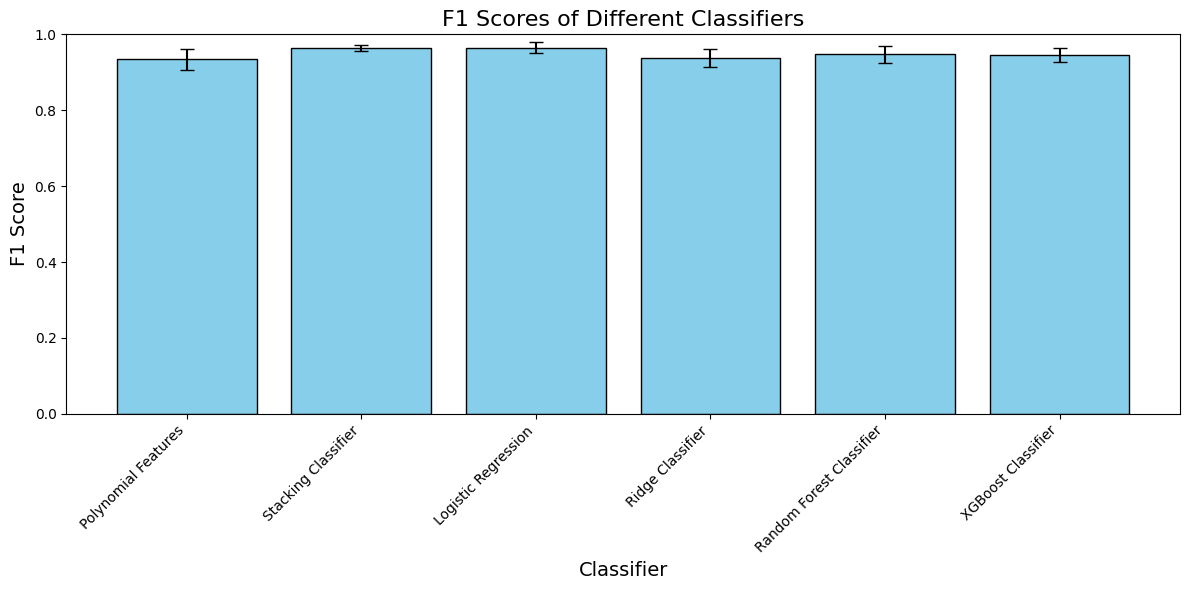

In [1]:
import matplotlib.pyplot as plt

# Data from the experiments
models = [
    'Polynomial Features',
    'Stacking Classifier',
    'Logistic Regression',
    'Ridge Classifier',
    'Random Forest Classifier',
    'XGBoost Classifier'
]

# Corresponding F1 scores (mean values)
f1_scores = [
    0.9340367562844628,
    0.9644964180362411,
    0.9645989974937343,
    0.9376892615886326,
    0.9470579102623815,
    0.9457776911905352
]

# Standard deviations for F1 scores
f1_std = [
    0.027387003695797302,
    0.007227169357834982,
    0.01419833232283792,
    0.023876361403433587,
    0.02167801232815656,
    0.019439440823902254  # XGBoost standard deviation
]

# Create a bar plot with error bars
plt.figure(figsize=(12,6))
plt.bar(models, f1_scores, yerr=f1_std, capsize=5, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('F1 Scores of Different Classifiers', fontsize=16)
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)

# Display the plot
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 (for F1 scores)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()


# Export Model

In [13]:
import joblib

# Retrain the best model (Logistic Regression) on the entire training set
best_model = LogisticRegression(random_state=42, max_iter=1000)
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Preprocessing
    ("classifier", best_model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the model to a file
joblib.dump(pipeline, "best_logistic_regression_model.pkl")
print("Model saved as 'best_logistic_regression_model.pkl'")

Model saved as 'best_logistic_regression_model.pkl'


### Streamlit and Fast API Code

In [ ]:
### streamlit
import streamlit as st
import numpy as np
import requests  # We will use requests to call FastAPI

# Streamlit UI
st.title("Breast Cancer Classification")
st.write(
    """
    Enter the tumor features below, and the model will classify the tumor as:
    - **0**: Benign
    - **1**: Malignant
    """
)

# Input fields for tumor features
st.header("Input Tumor Features")
features = []
for i in range(1, 31):
    value = st.number_input(f"Feature {i}", value=0.0, step=0.01)
    features.append(value)

# Classify button
if st.button("Classify"):
    # Send the features to FastAPI for prediction
    api_url = "http://localhost:8000/predict"  # Change to EC2 IP if running on remote server
    response = requests.post(api_url, json={"features": features})

    if response.status_code == 200:
        prediction = response.json()
        # Display result based on prediction
        if prediction["prediction"] == 1:
            st.error("The tumor is predicted to be **Malignant**.")
        else:
            st.success("The tumor is predicted to be **Benign**.")
    else:
        st.error("Failed to get a prediction. Please try again.")

### FastAPI

from fastapi import FastAPI
from fastapi.responses import JSONResponse
from pydantic import BaseModel
import uvicorn
import threading
import numpy as np
import joblib

# Load the trained Logistic Regression model
model = joblib.load("best_logistic_regression_model.pkl")

# FastAPI Application
fastapi_app = FastAPI()

# Pydantic schema for FastAPI
class PredictionInput(BaseModel):
    features: list[float]  # List of 30 feature values

@fastapi_app.post("/predict")
async def predict(input_data: PredictionInput):
    # Convert input features to a numpy array
    input_array = np.array(input_data.features).reshape(1, -1)

    # Make prediction
    prediction = model.predict(input_array)

    return JSONResponse(content={"prediction": int(prediction[0])})

# Threading to run Streamlit and FastAPI together
def start_fastapi():
    uvicorn.run(fastapi_app, host="0.0.0.0", port=8000)

def start_streamlit():
    import subprocess
    import os
    # Ensure we are running Streamlit from the correct directory
    current_dir = os.path.dirname(os.path.abspath(__file__))  # Get the current working directory
    streamlit_cmd = ["streamlit", "run", os.path.join(current_dir, "ui.py")]
    subprocess.run(streamlit_cmd)

if __name__ == "__main__":
    # Start FastAPI in one thread
    fastapi_thread = threading.Thread(target=start_fastapi)
    fastapi_thread.start()

    # Start Streamlit in another thread
    streamlit_thread = threading.Thread(target=start_streamlit)
    streamlit_thread.start()

    # Wait for both threads to finish
    fastapi_thread.join()
    streamlit_thread.join()

### Dockerfile

In [ ]:
# Use an official Python image
FROM python:3.10-slim

# Set the working directory in the container
WORKDIR /app

# Copy the necessary files into the container
COPY app.py ui.py best_logistic_regression_model.pkl requirements.txt /app/

# Install dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Expose the ports for FastAPI (8000) and Streamlit (8501)
EXPOSE 8000
EXPOSE 8501

# Start both FastAPI and Streamlit using a process manager or a shell script
CMD ["sh", "-c", "python3 app.py"]